# Overview

### The Goal of my project is optimizing video ads targeting based on historical user data.  I am using a user categories data set from a recent  campaign, trying to build a predictive model that will predict the likelihood of visiting the Brand Web Site   

# 1. The Data Set 

The data source comes from 3rd party data providers. 

## Pre - Processing Data

The original data file cotained over 40K features. To make the data more managable I created a pre processing python script
which merged some of the features and removed others.

## Load & Cleanup Data:¶

- Each row represents one user. 
- The columns (or features) are the user categories - this is our “X” variable. <br>
- The target (our "Y" variable) is the "Visited Brand" column, which is a true ("1") if the user either visited the 
  website in the past, or clicked on an ad - I assume that this means the user is "Intrested In the Brand"




In [17]:
data = pd.read_csv('/vagrant/829/filtered_output_for_campaign_829.csv')
df = data.fillna(0)  ## replace null values with zeros
df = df.rename(columns={'PIA': 'Visited Brand'})
df = df.drop(['DATE','USER ID', 'CAMPAIGN ID','Retargeting', 'Clicker'], axis=1) 
df = df.ix[:,(df != 0).any(axis=0)] ## remove all columns with all zeros
df = df.ix[(df != 0).any(axis=1),:] ## remove all rows with all zeros
X = df.drop(['Visited Brand'], axis=1)
Y = df['Visited Brand']

##### Our data set contains 37645 rows and 1168 columns:

In [10]:
df.head()

,10 - General Interest - Auto Enthusiasts,1006 - General Interest - Green Living,1007 - Politics - Political Junkies,10082 - Finance and Insurance - Mortgages - Mortgage Hyper-Intent,1017 - Shopping - Mobile - Carrier: AT&T,10179 - Travel - Departure - Europe,1018 - Shopping - Mobile - Carrier: T-Mobile,10180 - Travel - Departure - North America,1019 - Shopping - Mobile - Carrier: Sprint,1020 - Shopping - Mobile - Carrier: Verizon,...,9315 - Auto - Buyers - Make:RAM - 1500,9321 - Auto - Buyers - Make:Tesla - Model S,9638 - Finance and Insurance - Auto Intenders,9969 - Finance and Insurance - Banking - Checking and Savings,9970 - Finance and Insurance - Credit Cards - Small Business,9989 - CPG - Dish and Dishwasher Detergent,3211 - Services - Personal Services and Care - Children Daycare,5106 - Entertainment - Music - Jazz/Blues,Completer,Visited Brand
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,1,1
3,1,1,1,0,0,0,0,0,0,0,...,0,0,1,1,1,1,0,0,1,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,1,1,1,0,0,0,1,1


## Exploratory data analysis

Lets do some simple visualization of our data, just to get a "feel".


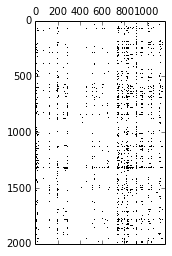

In [14]:
spy(df.ix[:2000,:])

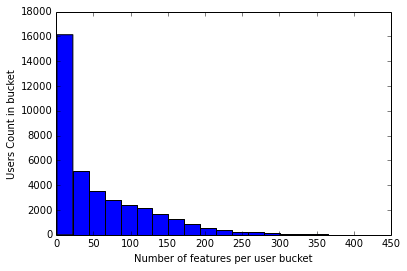

In [21]:
sum_df_row = df.sum(axis=1) ## sum of each row
plt.hist(sum_df_row,20)
plt.xlabel('Number of features per user bucket')
plt.ylabel('Users Count in bucket')

The above histogram shows the ditrubution of Number of features and user count. as expected, most users have a low number of
features, between 0-25

##### Lets see which categories are the most common in our data set: 

In [11]:
sum_df_col = df.sum(axis=0) ## sum of each column
sum_df_col.sort(ascending=False)
sum_df_col.head(10)

Completer                                             26877
 25 - Entertainment                                   25182
 2 - Finance                                          20855
 40 - Shopping                                        19625
 3365 - General Interest - News and Current Events    17504
 1141 - Services - Finance and Insurance - Banking    17403
 9160 - Finance and Insurance                         17245
 6229 - Auto Owners                                   17227
 1438 - CPG                                           16730
 32 - Hobbies                                         16719
dtype: float64

# 2. Model Testing Process

We'll start with one model to understand the basic workflow: <br>
* Create <b>test - train</b> split: 80% of the data is used for fitting our model, 20% for testing the model.
* Fit the model on training data (X_train, Y_train)
* Predict probabilities of Test data (X_test) 
* Score the mofel performance by comparing predicted probabilities with actual resluts (Y_test) 

### 2.1 Create test - train split

In [18]:
(X_train, X_test,
 Y_train, Y_test) = cv.train_test_split(X, Y,
                                            test_size=.2)

### 2.2 Fit model - Logistic Regression

In [19]:
model = LogisticRegression()
model.fit(X_train,Y_train) 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, penalty='l2', random_state=None, tol=0.0001)

### 2.3 Visualization - Display first 10 rows of test set, their predicted probabiliy and actual values 

In [22]:
Y_test_predicted_prob = model.predict_proba(X_test)
pd.DataFrame({'Prob of 1' : pd.Series(Y_test_predicted_prob[:10,1]), 'Actaul value' : Y_test[:10]  })

,Actaul value,Prob of 1
0,0,0.320019
1,1,0.402803
2,1,0.204791
3,1,0.212002
4,0,0.586597
5,1,0.644900
6,1,0.707272
7,0,0.181339
8,0,0.317811
9,0,0.144540


(array([   22.,   510.,  1931.,  1145.,   832.,   597.,   480.,   409.,
         330.,   280.,   225.,   198.,   148.,   134.,    90.,    72.,
          56.,    37.,    24.,     9.]), array([ 0.02713403,  0.0751214 ,  0.12310877,  0.17109615,  0.21908352,
        0.26707089,  0.31505827,  0.36304564,  0.41103301,  0.45902038,
        0.50700776,  0.55499513,  0.6029825 ,  0.65096987,  0.69895725,
        0.74694462,  0.79493199,  0.84291937,  0.89090674,  0.93889411,
        0.98688148]), <a list of 20 Patch objects>)


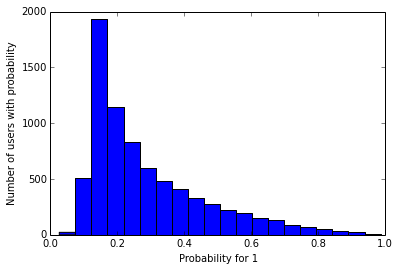

In [24]:
printPredictionPlot(Y_test_predicted_prob, Y_test)

### 2.4 Scoring Method - Roc_Auc

#### Roc_auc is the best scoring method for our problem as it takes into accout all the different possible thresholds.<br> In addition, roc_auc works for highly unbalanced classes. <br> Choosing the actual threshold is more of a business decision - do I want to maximize TP Rate or minimize FP rate

In [26]:
prob_array = np.array(Y_test_predicted_prob)
y_predicted_prob = prob_array[:,1]
score_roc_auc = roc_auc_score(Y_test, y_predicted_prob)   
print "Roc Score: ", score_roc_auc

Roc Score:  0.702166599439


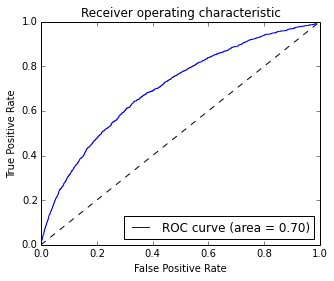

In [29]:
display_roc_curve(Y_test, Y_test_predicted_prob)

# 3. Model selection - find best model

#### Model Tester automates the model testing process and allows us to easily test different models.(See implementaion at the end of this notebook)

In [38]:
from sklearn.ensemble import AdaBoostClassifier
classifiers = {'Logistic': LogisticRegression(),
               'BernoulliNB': BernoulliNB(),                                     
               'RandomForest': RandomForestClassifier(),
               'AdaBoostClassifier' : AdaBoostClassifier()
               }

modelTester = ModelTester(X,Y,classifiers)
## test_classifiers recieves the number of times to run each model (each time
## on different training set). In this case - 3 times
modelTester.test_classifiers(3) 

testing model:  RandomForest
RandomForest had an average roc_auc score of 0.649 

testing model:  BernoulliNB
BernoulliNB had an average roc_auc score of 0.633 

testing model:  AdaBoostClassifier
AdaBoostClassifier had an average roc_auc score of 0.704 

testing model:  Logistic
Logistic had an average roc_auc score of 0.697 



# 4. Optimize models with grid search 

#### Grid search allows us to easily test different parameters for each model. ModelOptimizer is a class that automates gridSearch on multiple models (see implementation in the end of this notebook)

In [39]:
modelOptimizer= ModelOptimizer(X, Y)
modelOptimizer.add_model("BernoulliNB",BernoulliNB(),param_grid={'alpha':np.linspace(0.01, .2, 5)} )
modelOptimizer.add_model("Logistic",LogisticRegression(),param_grid={'C':np.linspace(0.0001, 0.2, 10)})
modelOptimizer.add_model("RandomForest",RandomForestClassifier(),param_grid={'max_depth':range(5,9,1),'n_estimators':[90,200,300], 'max_features' : ['sqrt', 'log2'] } )
modelOptimizer.add_model("AdaBoostClassifier",AdaBoostClassifier(),param_grid={'n_estimators':[90,200,300] })
modelOptimizer.test_models()

BernoulliNB: 
------------------------
score: 0.624579355793
best estomator:  BernoulliNB(alpha=0.15250000000000002, binarize=0.0, class_prior=None,
      fit_prior=True)
best params:  {'alpha': 0.15250000000000002}

Logistic: 
------------------------
score: 0.703818914304
best estomator:  LogisticRegression(C=0.022311111111111111, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, penalty='l2',
          random_state=None, tol=0.0001)
best params:  {'C': 0.022311111111111111}

RandomForest: 
------------------------
score: 0.700338800137
best estomator:  RandomForestClassifier(bootstrap=True, compute_importances=None,
            criterion='gini', max_depth=8, max_features='sqrt',
            max_leaf_nodes=None, min_density=None, min_samples_leaf=1,
            min_samples_split=2, n_estimators=300, n_jobs=1,
            oob_score=False, random_state=None, verbose=0)
best params:  {'max_features': 'sqrt', 'n_estimators': 300, 'max_depth': 8}

AdaBoostC

### The best models are: RandomForest, LogisticRegression and AdaBoost

# 5. Additional Optimization attempts

### 5.1 Remove features with less than 10000 users

In [127]:
df_filtered = df.ix[:,df.sum(axis=0) > 10000]
X_filtered = df_filtered.drop(['Visited Brand'], axis=1)
Y_filtered = df['Visited Brand']

In [128]:
Y_filtered.describe()

count    37645.000000
mean         0.292044
std          0.454709
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
dtype: float64

In [129]:
X_filtered.shape

(37645, 50)

In [119]:
modelTester = ModelTester(X_filtered,Y_filtered,{'Logistic': LogisticRegression()})
modelTester.test_classifiers(3) 

testing model:  Logistic
Logistic had an average roc_auc score of 0.703 



In [114]:
arr = modelTester.clf_.coef_
arr.shape

(1, 50)

In [120]:
c_df = pd.DataFrame(arr.reshape(50,1), columns=['coef'])
c_df['column'] = X_filtered.columns
c_df = c_df.sort(columns='coef',ascending=False)
c_df
#tmp = df[['Exelate 222 - Auto - Buyers - Make:BMW', 'Visited Brand']]
#tmp[tmp['Exelate 222 - Auto - Buyers - Make:BMW'] == 1]

,coef,column
16,0.452968,Exelate 219 - Shopping - Mobile
46,0.287411,Exelate 9160 - Finance and Insurance
20,0.219871,Exelate 281 - Shopping - Food and Wine
29,0.201137,Exelate 46 - Entertainment - Movies
25,0.190534,Exelate 3365 - General Interest - News and Cur...
39,0.161935,Exelate 5405 - Purchase Behaviors - Shopping -...
3,0.156573,Exelate 1141 - Services - Finance and Insuranc...
32,0.152598,Exelate 49 - Auto Buyers
2,0.136335,Exelate 1126 - Services - Finance and Insurance
48,0.134487,Exelate 9167 - Finance and Insurance - Mortgages


In [123]:
modelOptimizer= ModelOptimizer(X_filtered, Y_filtered)
modelOptimizer.add_model("BernoulliNB",BernoulliNB(),param_grid={'alpha':np.linspace(0.01, .2, 5)} )
modelOptimizer.add_model("Logistic",LogisticRegression(),param_grid={'C':np.linspace(0.0001, 0.2, 10)})
modelOptimizer.add_model("RandomForest",RandomForestClassifier(),param_grid={'max_depth':range(5,9,1),'n_estimators':[90,200,300], 'max_features' : ['sqrt', 'log2'] } )
modelOptimizer.add_model("AdaBoostClassifier",AdaBoostClassifier(),param_grid={'n_estimators':[90,200,300] })
modelOptimizer.test_models()

BernoulliNB: 
------------------------
score: 0.685878099692
best estomator:  BernoulliNB(alpha=0.15250000000000002, binarize=0.0, class_prior=None,
      fit_prior=True)
best params:  {'alpha': 0.15250000000000002}

Logistic: 
------------------------
score: 0.707319942713
best estomator:  LogisticRegression(C=0.088944444444444451, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, penalty='l2',
          random_state=None, tol=0.0001)
best params:  {'C': 0.088944444444444451}

RandomForest: 
------------------------
score: 0.710727958712
best estomator:  RandomForestClassifier(bootstrap=True, compute_importances=None,
            criterion='gini', max_depth=8, max_features='sqrt',
            max_leaf_nodes=None, min_density=None, min_samples_leaf=1,
            min_samples_split=2, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0)
best params:  {'max_features': 'sqrt', 'n_estimators': 200, 'max_depth': 8}

AdaBoostC

In [221]:
testDataFrame(df_filtered)

(37645, 811)
BernoulliNB: 
------------------------
score: 0.62370416378
best estomator:  BernoulliNB(alpha=0.03111111111111111, binarize=0.0, class_prior=None,
      fit_prior=True)
best params:  {'alpha': 0.03111111111111111}

Logistic: 
------------------------
score: 0.702768092924
best estomator:  LogisticRegression(C=0.10000000000000001, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, penalty='l2',
          random_state=None, tol=0.0001)
best params:  {'C': 0.10000000000000001}

RandomForest: 
------------------------
score: 0.697006533111
best estomator:  RandomForestClassifier(bootstrap=True, compute_importances=None,
            criterion='gini', max_depth=6, max_features='auto',
            max_leaf_nodes=None, min_density=None, min_samples_leaf=1,
            min_samples_split=2, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0)
best params:  {'max_depth': 6}



# 6. Summary

* We learned that the best models for this data set are random forest, AdaBoost and logistic regression. 
* Tweaking the different models showed some improvement, although not very significant. Feature selection is more important! 
* In this example, we use a pretty small data set. Using a larger Data set will 
  very likely improve our results. 



## Future Work

* Working with larger data sets - use sparse matrix libraries and chunk data loading when the data is too big to 
  fit in memory
* Working with <b> VERY </b> large data sets - use Spark to run model on a distributed system. 
* Practical uses - test performance, we have very strict performance requirments in the bidder, model must be able to run on a  
  single line in less than 20ms. 
* Try to give weights to features rather than users.

# 7. Implementaion

In [122]:
import numpy as np
import pandas as pd
import sklearn
import sklearn.linear_model as lm
import sklearn.cross_validation as cv
import sklearn.grid_search as gs
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import metrics
from sklearn.cross_validation import train_test_split, Bootstrap
from sklearn.datasets import make_blobs
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RandomizedLogisticRegression
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from IPython.display import Image
from sklearn.decomposition import PCA
import sklearn.grid_search as gs
from sklearn.metrics import recall_score
conf_matrix_image = Image(url='https://computersciencesource.files.wordpress.com/2010/01/conmat.png')
%matplotlib inline

In [13]:
def testDataFrame(df):   
    X = df.drop(['Visited Brand'], axis=1)
    Y = df['Visited Brand']
    modelOptimizer= ModelOptimizer(X, Y)
    modelOptimizer.add_model("Logistic",LogisticRegression(),param_grid={'C':np.linspace(0.1, 0.4, 14)} )
    modelOptimizer.add_model("RandomForest",RandomForestClassifier(),param_grid={'max_depth':range(4,8,1)} )
    modelOptimizer.test_models()

In [62]:
class ModelTester:
    def __init__(self, X, Y,classifiers):
        self.X_matrix = X
        self.Y_vector = Y        
        self.classifiers = classifiers
        self.printConfusionMatrix = False
        self.verbose = False
        
        
        
    def runClassifier(self, X,Y, clf, times): 
        sum_scores = 0.0
        sum_scores_roc_auc = 0.0
        conf_matrix = None
        conf_matrix = np.array([[0,0], [0,0]])
        printCurve = False

        for i in range(times):
             (X_train, X_test,
             y_train, y_test) = cv.train_test_split(X, Y,
                                                test_size=.2)
             clf.fit(X_train,y_train)
             self.clf_ = clf   
             prob_array = np.array(clf.predict_proba(X_test))
             y_hat = prob_array[:,1]
             y_pred = clf.predict(X_test)
             roc_score = roc_auc_score(y_test, y_hat)  
             if self.verbose:   
                 print "current roc score: ", roc_score  
             if printCurve:                        
                 display_roc_curve(y_test,prob_array)
                 printCurve = False       
             sum_scores_roc_auc += roc_score      
             sum_scores += recall_score(y_test, y_pred)
             if (self.printConfusionMatrix):                 
                conf_matrix += metrics.confusion_matrix(y_test, y_pred)       

             #print "%s had an accuracy score of %0.2f"% (name, score)            
        return sum_scores / times, sum_scores_roc_auc / times, conf_matrix / times

    def test_classifiers(self, times):
        for name, clf in self.classifiers.items():
            print "testing model: ", name
            score, score_roc_auc, conf_matrix = self.runClassifier(self.X_matrix,self.Y_vector,clf, times)   
            #print "%s had an average recall score of %0.3f, and roc_auc score of %0.2f"% (name, score, score_roc_auc)
            print "%s had an average roc_auc score of %0.3f \n"% (name, score_roc_auc)
            if (self.printConfusionMatrix):
                print "confusion matrix: "
                print conf_matrix
    


In [15]:
class ModelOptimizer:
    def __init__(self, x, y):
        self.models = []
    
        (x_train, x_test,
         y_train, y_test) = cv.train_test_split(x, y,
                                        test_size=.2)
        self.x_train = x_train
        self.x_test = x_test
        self.y_train = y_train
        self.y_test = y_test
        
        
    def add_model(self, name, model, param_grid={}):
        optimized_model = gs.GridSearchCV(model, param_grid, scoring='roc_auc', n_jobs=4, cv=3) 
        optimized_model.fit(self.x_train, self.y_train)
        data = {
            'name':name,           
            'model': optimized_model
        }
        self.models.append(data)
        
    def test_models(self):
        for model in self.models:            
            prob_array = np.array( model['model'].predict_proba(self.x_test))
            y_hat = prob_array[:,1]
            score = roc_auc_score(self.y_test, y_hat)     
            #score = model['model'].score(self.x_test, self.y_test)
            print "%s: " % model['name'] 
            print "------------------------"
            print "score: %s" % (score)
            print "best estomator: " ,model['model'].best_estimator_
            print "best params: " , model['model'].best_params_
            print ""

In [16]:
from sklearn.metrics import roc_curve, auc
def display_roc_curve(ytest, y_prob):
    false_pos_rate, true_pos_rate, thresholds = roc_curve(ytest, y_prob[:, 1])
    roc_auc = auc(false_pos_rate, true_pos_rate)
    # Plot ROC curve
    # setup figure
    plt.figure(figsize=(5, 4))
    plt.clf()
    plt.plot(false_pos_rate, true_pos_rate, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

def printPredictionPlot(Y_test_predicted_prob, Y_test):
    prob_df = pd.DataFrame(Y_test_predicted_prob[:10], columns=['0 predicted prob', '1 predicted prob'])
    prob_df ['actual value'] = Y_test[:10]
    pd.options.display.float_format = '{:10,.3f}'.format
    
    tmp = plt.hist(Y_test_predicted_prob[:,1],20)
    plt.xlabel('Probability for 1')
    plt.ylabel('Number of users with probability')
    print tmp
    
def printConfusionMatrix(model, threshold, X_train, X_test, Y_train, Y_test):
    
    model.fit(X_train,Y_train) 
    y_pred = predictWithThreshhold(model, threshold, X_test)
    
    print metrics.confusion_matrix(Y_test, y_pred)   
    
def predictWithThreshhold(model, threshhold, x_test):
    
    prob = model.predict_proba(x_test)
    return map(lambda x: 1 if x[1] > threshhold else 0, prob)



In [ ]:
printConfusionMatrix(LogisticRegression(), 0.3, X_train, X_test, Y_train, Y_test)